# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
%matplotlib inline
import os
import random

import tensorflow as tf
from PIL import Image
import numpy as np
from matplotlib import pylab as plt
from matplotlib import patches

In [18]:
# url = "./data/waymo/training_and_validation/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord"
# dataset = get_dataset(url)
path = "./data/waymo/training_and_validation/"
url_list = os.listdir(path)

rand_url = os.path.join(path + random.choice(url_list))

dataset = get_dataset(rand_url)

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/training_and_validation/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/training_and_validation/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

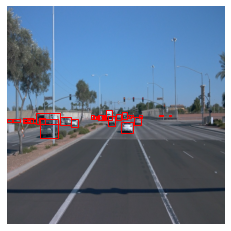

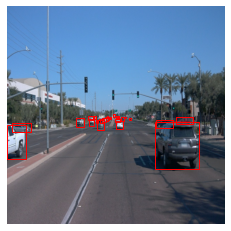

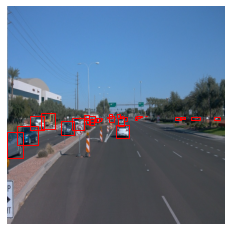

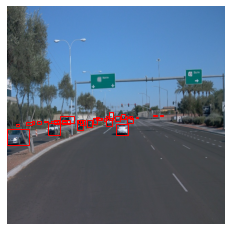

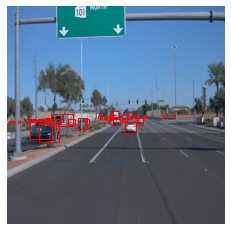

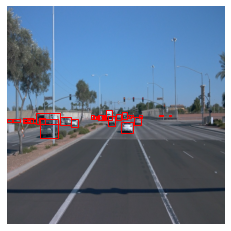

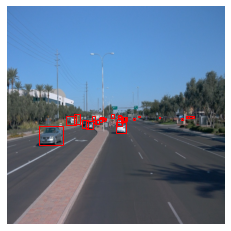

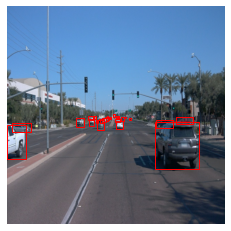

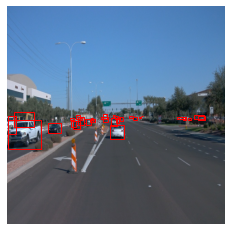

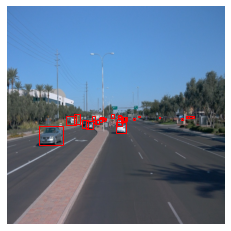

this dataset is:  ./data/waymo/training_and_validation/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrecord


In [19]:
## STUDENT SOLUTION HERE
## This code is reffered from udacity "knowledge" .


### function for display
def display_instances(ds):
    try:
        # color map
        color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    
        fig, ax = plt.subplots() 
        im = batch["image"].numpy()
        ax.imshow(im)
    
        # draw bounding boxes and add color to different class labels
        for coord, label in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
            xy = (coord[1]*im.shape[1], coord[0]*im.shape[0])
            #taken from class notes
            width = (coord[3] - coord[1])*im.shape[1]
            height = (coord[2] - coord[0])*im.shape[0]
            rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_map[label], facecolor='none')
            ax.add_patch(rec)
        plt.axis("off")
    except Exception as err:
        print(err)
        
### Display
plt.figure(figsize=(10, 10))
for i in range(10):
    for batch in dataset.shuffle(75, reshuffle_each_iteration=True).take(1):
        display_instances(batch)
plt.show()
print("this dataset is: ", rand_url)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

[1.](./data/waymo/training_and_validation/segment-10517728057304349900_3360_000_3380_000_with_camera_labels.tfrecord)
daytime, sunny, several cars parked side of the road, no centerline on the road

[2.](./data/waymo/training_and_validation/segment-10391312872392849784_4099_400_4119_400_with_camera_labels.tfrecord)
daytime, cloudy, a tank truck is in front of ego vehicle, one way road

[3.](./data/waymo/training_and_validation/segment-11219370372259322863_5320_000_5340_000_with_camera_labels.tfrecord)
daytime, rainy, several cars parked side of the road, broken line on the center of the road and solid line on the side of the road

[4.](./data/waymo/training_and_validation/segment-11388947676680954806_5427_320_5447_320_with_camera_labels.tfrecord)
daytime, sunny, a lot of cars on the road, a few pedestrians on the road, one way road

[5.](./data/waymo/training_and_validation/segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord)
daytime, rainy, several cars parked side on the road and front edge of the road, no centerline on the road, raindrop is on the camera

[6.](./data/waymo/training_and_validation/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrecord)
daytime, sunny, a lot of cars on the road, traffic lights